# 04 - Distribuição Normal e Teorema Central do Limite

Nessa aula, iremos tratar dos seguintes conteúdos:
- Distribuição Normal
- Teorema Central do Limite

<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>

## 

## Distribuição Normal

A distribuição normal é uma das distribuições mais conhecidas da estatística/probabilidade! Ela é  representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (bell shape).  

A curva de distribuição normal representa o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

<br><br>

### Definição Matemática

A Variável aleatória contínua $X$ que tome todos os valores na reta real $-\infty < X < \infty$ segue uma distribuição normal (ou Gaussiana) se sua função de densidade de probabilidade é dada por:

$$ f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{\frac{-(z - \mu)^2}{2\sigma^2}} $$

Onde respectivamente temos como __valor esperado__ e __variância__ da distribuição normal:

- __Valor esperado:__ $E[X] = \mu$

- __Variância:__ $V[X] = \sigma^2$


<br>

Usualmente aplicamos a notação X ~ N($\mu$,$\sigma^2$) para representar uma variável aleatória **com distribuição normal** de valor esperado/média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>


Em uma distribuição normal a média, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">


Vamos ver algumas formas de gerarmos valores de acordo com uma distribuição Normal:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

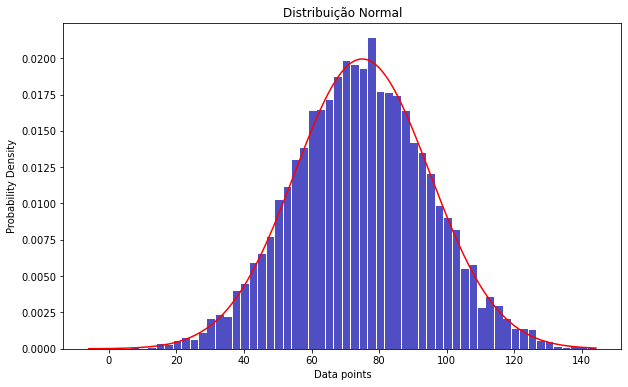

In [2]:
# funcao densidade de probabilidade da normal
def normal_dist(x , mu, sigma):
    prob_density = (1/(sigma*(math.sqrt(2*np.pi))))*np.exp(-0.5*((x - mu)/sigma)**2)
    return prob_density
 
# define valores para média e desvio padrão (Obs.: sigma = sqrt(variancia))
mu = 75
sigma = 20

# Número de amostras geradas
N = 10000

# Define um vetor X com os valores aleatorios da distribuição normal segundo mu e sigma
X = np.random.normal(mu, sigma, N)

# Define o tamanho de uma figura para o gráfico
plt.figure(figsize=(10,6))

# Plot do histograma dos valores aleatorios
Pk, bins, ignored = plt.hist(X, 
                             bins='auto', 
                             density=True, 
                             color='#0504aa',
                             alpha=0.7, 
                             rwidth=0.9)

# define os valores de x entre o minimo e maximo para gerarmos a curva normal
x = np.linspace(np.min(X),np.max(X),200)

# Dados para a curva normal
pdf = normal_dist(x, mu, sigma)

#Cria um titulo
plt.title('Distribuição Normal')

# Plot da curva normal
plt.plot(x, pdf, color = 'red')

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Probability Density')

# Mostrao Gráfico
plt.show()

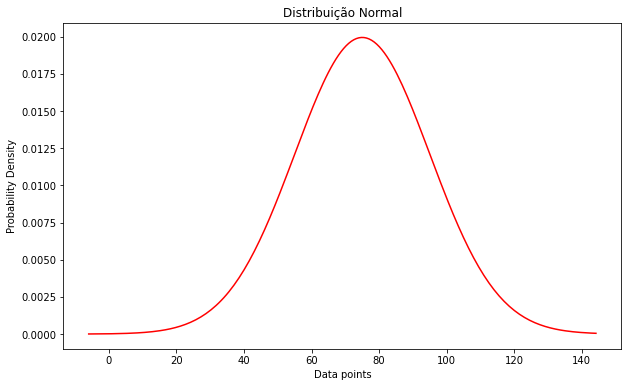

In [3]:
import scipy

# Gerando a mesma curva normal a partir de uma função do scipy
y = scipy.stats.norm(loc = mu, scale = sigma).pdf(x)

# Define o tamanho de uma figura para o gráfico
plt.figure(figsize=(10,6))

#Cria um titulo
plt.title('Distribuição Normal')

# Plot da curva normal
plt.plot(x, pdf, color = 'red')

# Label X
plt.xlabel('Data points')

# Label Y
plt.ylabel('Probability Density')

# Mostrao Gráfico
plt.show()

## 

## Normalização ou Z-Score
<br>

Imagine ter que calcular a probabilidade de uma distribuição normal de um determinado evento, utilizando a função de densidade de probabilidade. Seria bastante trabalho e nem um pouco usual! 

Para isso então que existe uma relação conhecida como normalização ou __Z-Score__, onde este parâmetro nada mais é que __o número de desvios padrões que a observação está com relação à média__:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$


<img src = "https://miro.medium.com/max/1200/1*IdGgdrY_n_9_YfkaCh-dag.png" width=800>
<br>

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers. Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

<br>

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**



onde o objetivo é convertermos os dados para uma distribuição normal na forma X ~ N($\mu$, $\sigma^2$) 

**Exemplo**: Se $X \sim  \mathcal{N}(\mu=165,\,\sigma^{2}=9)$, calcule $P(X<162)$.

In [9]:
# função para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# Média
mu = 165

# Desvio Padrão
sigma = np.sqrt(9)

# Z Score para 162
z = (162 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score: ', z)
print('Probabilidade: ', st.norm.cdf(z))

Z - Score:  -1.0
Probabilidade:  0.15865525393145707


**Exemplo**: Se $X \sim  \mathcal{N}(\mu=10,\,\sigma^{2}=4)$, calcule $P(X>13)$.

Obs.: Lembrando que para calcular essa probabilidade temos que fazer da seguinte forma:

$$ P(X > 13) = 1 - P( X \leq 13) $$

In [10]:
# função para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# Média
mu = 10

# Desvio Padrão
sigma = np.sqrt(4)

# Z Score para 13
z = (13 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score: ', z)
print('Probabilidade: ', 1 - st.norm.cdf(z))

Z - Score:  1.5
Probabilidade:  0.06680720126885809


**Exemplo:** O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 75,5 Kg e o desvio padrão é 7,5 Kg. Admitindo que os pesos são normalmente distribuídos, determine a percentagem de estudantes que pesam:

$$
P(60 \leq X \leq 77,5) = P\left(\frac{60-\mu}{\sigma} \leq \frac{X-\mu}{\sigma} \leq \frac{77,5-\mu}{\sigma}\right)=P\left(\frac{60-\mu}{\sigma} \leq Z \leq \frac{77,5-\mu}{\sigma}\right) = 
$$
$$
= P\left(Z \leq \frac{77,5-\mu}{\sigma}\right)-P\left( Z \leq \frac{60-\mu}{\sigma}\right)
$$a) entre 60 e 77,5 Kg. 


In [15]:
# função para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# Média
mu = 75.5

# Desvio Padrão
sigma = 7.5

# Calculando Z1 para 60 kg
z1 = (60 - mu)/sigma

# Calculando Z2 para 77.5 kg
z2 = (77.5 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score para 60 kg:   ', z1)
print('Z - Score para 77.5 kg: ', z2)
print('Probabilidade: ', st.norm.cdf(z2) - st.norm.cdf(z1))

Z - Score para 60 kg:    -2.066666666666667
Z - Score para 77.5 kg:  0.26666666666666666
Probabilidade:  0.5857543024471563


Podemos também resolver este item simulando os resultados:

In [18]:
# métrica mu e sigma
mu = 75.5
sigma = 7.5

# tamanho da amostra
N = 1000

# fixa a semente aleatória
np.random.seed(2)

# Gera uma amostra com mu e sigma para os N valores
X = np.random.normal(mu, sigma, N)

# Loop para o calculo da probabilidade
m = 0
for x in X:
    if x > 60 and x < 77.5:
        m = m + 1
print('Probabilidade (simulação):', m/N)

Probabilidade (simulação): 0.597


b) mais do que 92,5 Kg. 
$$
P(X \geq 92,5) = P\left( \frac{X-\mu}{\sigma}\geq \frac{92,5-\mu}{\sigma}\right) = P\left( Z \geq \frac{92,5-\mu}{\sigma}\right) = 1 - P\left( Z < \frac{92,5-\mu}{\sigma}\right)
$$

In [19]:
# função para calcular a probabilidade a partir do Z Score
import scipy.stats as st

# Média
mu = 75.5

# Desvio Padrão
sigma = 7.5

# Z Score para 92.5 kg
z = (92.5 - mu)/sigma

# Print do Z Score e da probabilidade
print('Z - Score: ', z)
print('Probabilidade: ', 1 - st.norm.cdf(z))

Z - Score:  2.2666666666666666
Probabilidade:  0.011705298080558313


Simulando:

In [20]:
# métrica mu e sigma
mu = 75.5
sigma = 7.5

# tamanho da amostra
N = 1000

# fixa a semente aleatória
np.random.seed(2)

# Gera uma amostra com mu e sigma para os N valores
X = np.random.normal(mu, sigma, N)

# Loop para o calculo da probabilidade
m = 0
for x in X:
    if x > 92.5:
        m = m + 1
print('Probabilidade (simulação):', m/N)

Probabilidade (simulação): 0.017


Uma forma mais tradicional também para calcular a probabilidade a partir de uma distribuição normal seria justamente utilizar de valores tabelados para o __Z-Score__:

<img src = "https://media.cheggcdn.com/media/70e/70ea2b20-f693-43d1-aa34-33289a97d606/phpqH8k6j" width = 800>

## 

## Teorema Central do Limite

Esse é um dos teoremas mais poderosos e fundamentais da estatística, porque ele é usado **como base para muitos outros resultados**. 

A ideia é que muitos dos resultados de inferência estatística são válidos assumindo como hipótese que os dados sob análise (**mais precisamente, os estimadores pontuais**) seguem uma distribuição normal. 

No entanto, há muitos casos de interesse em que a **distribuição populacional não é normal** -- e, na verdade, não temos como saber com segurança qual é a distribuição populacional, dado que temos apenas acesso às amostras!

Assim, a priori, muitos dos resultados e métodos da inferência estatística seriam invalidados, dado que não podemos assegurar qual é a distribuição populacional dos dados que estamos analisando.

E é neste contexto que o TLC mostra seu poder e importância, pois ele mostra que **estimadores pontuais de parâmetros populacionais serão normalmente distribuídos, INDEPENDENTE DA DISTRIBUIÇÃO POPULACIONAL!**

Vamos enunciá-lo, como:


Seja uma amostra aleatória $(X_1,X_2,\ldots,X_n)$ retiradas de uma população com média $\mu$ e variância $\sigma$. A distribuição amostral de $\bar{X}$ aproxima-se, para n grande ($n > 30$), de uma distribuição normal com média $E[\bar{X}]=\mu$ e variância $\sigma^2/n$.<br>.

C:\Users\sandro.saorin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


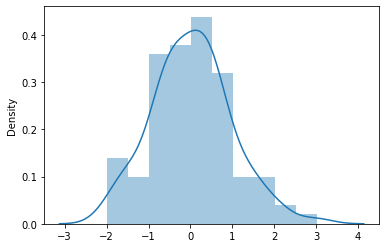

In [22]:
# tamanho da amostra
N = 100

# Gera a amostra de acordo com a distribuição normal
amostra_normal = np.random.normal(0, 1, N)

# Gera o gráfico
sns.distplot(amostra_normal)

# Mostra o gráfico
plt.show()

C:\Users\sandro.saorin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


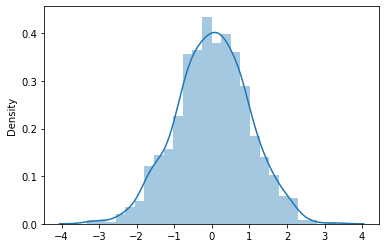

In [23]:
# tamanho da amostra
N = 1000

# Gera a amostra de acordo com a distribuição normal
amostra_normal = np.random.normal(0, 1, N)

# Gera o gráfico
sns.distplot(amostra_normal)

# Mostra o gráfico
plt.show()

C:\Users\sandro.saorin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


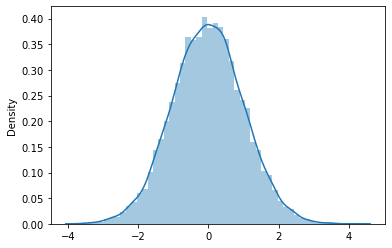

In [24]:
# tamanho da amostra
N = 10000

# Gera a amostra de acordo com a distribuição normal
amostra_normal = np.random.normal(0, 1, N)

# Gera o gráfico
sns.distplot(amostra_normal)

# Mostra o gráfico
plt.show()

**Exemplo:** Seja a variável aleatória com distribuição de probabilidade: P(X=3)=0,4; P(X=6)=0,3; P(X=8)=0,3. Uma amostra com 40 observações é sorteada. Qual é a probabilidade de que a média amostral ser maior do que 5?

In [25]:
# Função para a esperança
def esperanca(X, P):
    E = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
    return E
    
# Função para a variância
def variancia(X ,P):
    E = 0; E2 = 0
    for i in range(0, len(X)):
        E = E + X[i]*P[i]
        E2 = E2 + (X[i]**2)*P[i]
    V = E2-E**2
    return V

# Vetor de Eventos
X = [3,6,8]

# Vetor de Probabilidades
P = [0.4,0.3,0.3]

# Calculo da Esperança
E = esperanca(X,P)

# Calculo da Variância
V = variancia(X,P)

# Print das métricas
print("Esperança: ", E)
print("Variância: ", V)

Esperança:  5.4
Variância:  4.439999999999991


Valor teórico a partir do Z-Score:

In [26]:
# Função para calcaur a probabilidade pelo Z Score
import scipy.stats as st

# Define a média
mu = E

# Define o desvio padrão
sigma = np.sqrt(V)

# Tamanho da amostra
n = 40

# X a verificar
x = 5

# Z-score
Z = (x - mu)/(sigma/np.sqrt(n))

# Calculo da probabilidade
prob = 1-st.norm.cdf(Z)

# PRint da probabilidade
print('Probabilidade: ', prob)

Probabilidade:  0.885046886863795


Vamos sortear várias amostras de tamanho n = 40 e verificar qual a probabilidade da média dessa amostra ser maior do que 5.

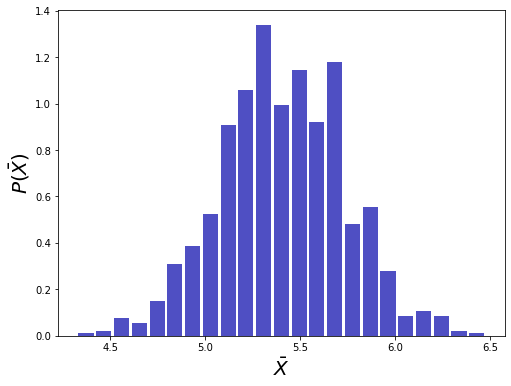

Media das amostras:  5.40765
Media da população:  5.4


In [27]:
# Tamanho de amostras
n = 40

# numero de simulações
ns = 1000

# Vetor vazio para armazenar a media amostral
vx = [] # armazena a media amostral

# Loop para as simulações
for s in range(0, ns):
    A = np.random.choice(X, n, p = P)
    vx.append(np.mean(A))

# Plot do gráfico
plt.figure(figsize=(8,6))
plt.hist(x=vx, bins='auto',color='#0504aa', alpha=0.7, rwidth=0.85, density = True)
plt.xlabel(r'$\bar{X}$', fontsize=20)
plt.ylabel(r'$P(\bar{X})$', fontsize=20)
plt.show()    

# Print das metricas
print("Media das amostras: ", np.mean(vx))
print("Media da população: ", E)

A probabilidade de ser maior do que 5:

In [29]:
prob_s = 0

for i in range(0, len(vx)):
    if(vx[i] > 5):
        prob_s = prob_s + 1
        
prob_s = prob_s/len(vx)

print("Probabilidade > 5: ", prob_s) 
print("Valor teórico    : ", prob)

Probabilidade > 5:  0.893
Valor teórico    :  0.885046886863795


## 

## Exercícios

**1)** Uma máquina de bebidas está regulada de modo a servir uma média de 150ml por copo. Se a quantidade servida por copo seguir uma distribuição normal com desvio padrão de 20 ml, determine a percentagem de copos que conterão mais de 175ml de bebida.

__2)__ O tempo para desenvolver um servidor web em uma empresa é descrito por uma variável aleatória X, medida em dias, com distribuição normal de média $\mu$ = 45 e variância $\sigma^2$ = 400. Calcule a probabilidade de que um novo servidor web será finalizado entre 30 e 40 dias.

__3)__ Uma população é descrita pela seguinte distribuição de probabilidades:
    
- 𝑃(𝑋 = 2) = 0,2;
- 𝑃(𝑋 = 4) = 0,4;
- 𝑃(𝑋 = 6) = 0,4

Uma amostra com 50 observações é sorteada. Calcule a probabilidade de que a média dessa amostra seja maior do que 4.5

__4)__ Em uma empresa de vendas planos de internet, a duração de conversas telefônicas (em minutos), segue o modelo de uma distribuição exponencial com parâmetro $\lambda = \frac{1}{5}$. Observando-se uma amostra aleatória de 50 dessas chamadas, qual será a probabilidade de que tais amostras em média não ultrapassem 6 minutos?